In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
import nltk
nltk.download('punkt') #for word tokenization
nltk.download('stopwords') #for removing or getting list of stopwords
nltk.download('wordnet') #for lemmatization

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\swapn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\swapn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\swapn\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
from nltk.tokenize import word_tokenize
from nltk.corpus import  stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [4]:
df = pd.read_csv("alexa_reviews.csv")

In [5]:
df

,Unnamed: 0,verified_reviews,feedback
0,0,Love my Echo!,1
1,1,Loved it!,1
2,2,"Sometimes while playing a game, you can answer...",1
3,3,I have had a lot of fun with this thing. My 4 ...,1
4,4,Music,1
...,...,...,...
3145,3145,"Perfect for kids, adults and everyone in betwe...",1
3146,3146,"Listening to music, searching locations, check...",1
3147,3147,"I do love these things, i have them running my...",1
3148,3148,Only complaint I have is that the sound qualit...,1


In [6]:
df.drop(["Unnamed: 0"],axis=1,inplace=True)

In [7]:
df

,verified_reviews,feedback
0,Love my Echo!,1
1,Loved it!,1
2,"Sometimes while playing a game, you can answer...",1
3,I have had a lot of fun with this thing. My 4 ...,1
4,Music,1
...,...,...
3145,"Perfect for kids, adults and everyone in betwe...",1
3146,"Listening to music, searching locations, check...",1
3147,"I do love these things, i have them running my...",1
3148,Only complaint I have is that the sound qualit...,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   verified_reviews  3150 non-null   object
 1   feedback          3150 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 49.3+ KB


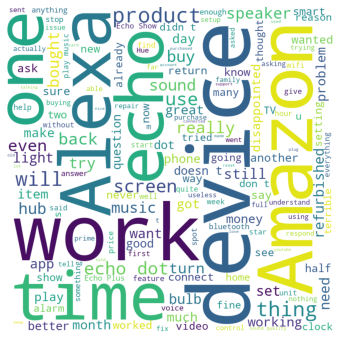

In [9]:
wc = WordCloud(width=800, height=800, background_color="white", min_font_size=10)
wc.generate("".join(df[df['feedback']==0]['verified_reviews']))

plt.figure(figsize=(6,6))
plt.imshow(wc)
plt.axis("off")
plt.show()

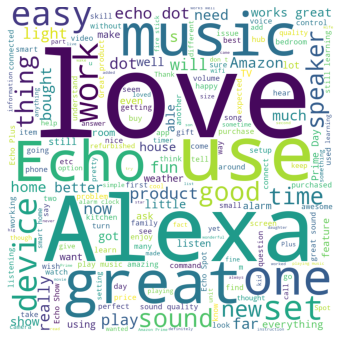

In [10]:
wc = WordCloud(width=800, height=800, background_color="white", min_font_size=10)
wc.generate("".join(df[df['feedback']==1]['verified_reviews']))

plt.figure(figsize=(6,6))
plt.imshow(wc)
plt.axis("off")
plt.show()

In [11]:
stop = stopwords.words("english")
def clean_text(text):
  tokens = word_tokenize(text.lower())
  # Filter only alphabets
  word_tokens = [t for t in tokens if t.isalpha()]
  clean_tokens = [t for t in word_tokens if t not in stop]
  lemma = WordNetLemmatizer()
  lemma_tokens = [lemma.lemmatize(t) for t in clean_tokens]
  return " ".join(lemma_tokens)

In [12]:
df['verified_reviews'] = df['verified_reviews'].apply(clean_text)

In [13]:
df['verified_reviews'].head()

0                                            love echo
1                                                loved
2    sometimes playing game answer question correct...
3    lot fun thing yr old learns dinosaur control l...
4                                                music
Name: verified_reviews, dtype: object

In [14]:
x= df['verified_reviews']
y= df['feedback']

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [16]:
sent_len = []
for t in df['verified_reviews']:
  sent_len.append(len(word_tokenize(t)))
df['sent_len'] = sent_len
df.head()

,verified_reviews,feedback,sent_len
0,love echo,1,2
1,loved,1,1
2,sometimes playing game answer question correct...,1,17
3,lot fun thing yr old learns dinosaur control l...,1,18
4,music,1,1


In [17]:
max(sent_len)

245

In [18]:
np.quantile(sent_len, 0.95)

40.0

In [19]:
max_len = 40

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.text import Tokenizer 
# Creates dictionary and every unique word is given number key
from tensorflow.keras.preprocessing import sequence
# To perform the padding of the documents with zero's to make the length of the
# document common
from tensorflow.keras.layers import (LSTM, Dropout, Embedding, SimpleRNN, GRU)
# All the index numbers are converted to vectors using Embedding
# SimpleRNN allows to implement the RNN architecture - activation function -tanh
# Dropout - manage overfitting of model

In [21]:
# Tokenization
tok = Tokenizer(char_level=False, split=" ")
tok.fit_on_texts(x_train)

In [22]:
tok.index_word

{1: 'love',
 2: 'echo',
 3: 'great',
 4: 'alexa',
 5: 'music',
 6: 'work',
 7: 'like',
 8: 'use',
 9: 'sound',
 10: 'device',
 11: 'one',
 12: 'dot',
 13: 'easy',
 14: 'speaker',
 15: 'set',
 16: 'good',
 17: 'get',
 18: 'thing',
 19: 'product',
 20: 'amazon',
 21: 'play',
 22: 'time',
 23: 'would',
 24: 'home',
 25: 'still',
 26: 'show',
 27: 'bought',
 28: 'really',
 29: 'better',
 30: 'much',
 31: 'day',
 32: 'smart',
 33: 'prime',
 34: 'also',
 35: 'light',
 36: 'new',
 37: 'quality',
 38: 'well',
 39: 'room',
 40: 'need',
 41: 'far',
 42: 'got',
 43: 'fun',
 44: 'even',
 45: 'tv',
 46: 'alarm',
 47: 'video',
 48: 'everything',
 49: 'little',
 50: 'could',
 51: 'house',
 52: 'turn',
 53: 'screen',
 54: 'spot',
 55: 'know',
 56: 'feature',
 57: 'buy',
 58: 'learning',
 59: 'make',
 60: 'ask',
 61: 'plus',
 62: 'weather',
 63: 'lot',
 64: 'using',
 65: 'tell',
 66: 'want',
 67: 'nice',
 68: 'able',
 69: 'voice',
 70: 'clock',
 71: 'see',
 72: 'used',
 73: 'hub',
 74: 'problem',
 75: 

In [23]:
vocab_len = len(tok.index_word)
vocab_len

2987

In [24]:
seq_train = tok.texts_to_sequences(x_train)
seq_train

[[1, 54],
 [67, 6, 22, 13, 834, 69, 835, 319, 22, 22, 237, 1780],
 [25, 58, 1781, 1241, 646, 457, 1242, 320, 1782, 7, 26, 836, 1783],
 [1, 118, 121, 208, 30],
 [1784,
  458,
  171,
  1243,
  162,
  39,
  1785,
  119,
  575,
  837,
  14,
  105,
  114,
  535,
  37,
  9,
  213,
  16,
  126,
  2,
  486,
  111,
  992,
  1244,
  45,
  107,
  2,
  1786,
  9,
  1787,
  1245,
  838,
  16,
  426,
  576,
  337,
  9,
  839,
  1788,
  730,
  265,
  188,
  993,
  1789,
  1790,
  1246,
  354,
  6,
  3,
  1791,
  135,
  102,
  2,
  10,
  23,
  994,
  995,
  135,
  321,
  2,
  577,
  1792,
  1247,
  355,
  23,
  151,
  427,
  2,
  179,
  458,
  109,
  37,
  213,
  1793,
  996,
  1248,
  1794,
  647,
  16,
  1795,
  1796,
  575,
  1249,
  44,
  1797,
  1798,
  83,
  1799,
  252,
  199,
  238,
  378,
  253,
  110,
  840,
  338,
  284,
  11,
  27,
  302,
  110,
  162,
  39,
  648,
  400,
  487,
  35,
  75,
  4,
  96,
  10,
  731,
  356,
  110,
  1800,
  102,
  35,
  140,
  35,
  1801,
  648,
  400,
  487,

In [25]:
seq_padded_train = sequence.pad_sequences(seq_train, maxlen=max_len)
seq_padded_train

array([[   0,    0,    0, ...,    0,    1,   54],
       [   0,    0,    0, ...,   22,  237, 1780],
       [   0,    0,    0, ...,   26,  836, 1783],
       ...,
       [   0,    0,    0, ...,    0,    0,   90],
       [   0,    0,    0, ...,    0, 1639,  134],
       [   0,    0,    0, ...,   26,    4,  107]])

In [26]:
model = Sequential()
# vectorization
model.add(Embedding(vocab_len+1,40, input_length=max_len, mask_zero=True))
# RNN layer
model.add(SimpleRNN(32, activation="tanh"))
# ANN's hidden layer
model.add(Dense(32, activation="relu"))
# To check on overfitting
model.add(Dropout(0.2))
# output layer
model.add(Dense(1, activation="sigmoid"))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 40, 40)            119520    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2336      
_________________________________________________________________
dense (Dense)                (None, 32)                1056      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 122,945
Trainable params: 122,945
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(loss="binary_crossentropy", optimizer="adam")

In [29]:
model.fit(seq_padded_train, y_train, batch_size=50, epochs=50)

Epoch 1/50
45/45 [==============================] - 2s 11ms/step - loss: 0.5967
Epoch 2/50
45/45 [==============================] - 0s 10ms/step - loss: 0.3192
Epoch 3/50
45/45 [==============================] - 0s 10ms/step - loss: 0.2379
Epoch 4/50
45/45 [==============================] - 0s 10ms/step - loss: 0.1135
Epoch 5/50
45/45 [==============================] - 0s 10ms/step - loss: 0.0485
Epoch 6/50
45/45 [==============================] - 0s 11ms/step - loss: 0.0324
Epoch 7/50
45/45 [==============================] - 1s 12ms/step - loss: 0.0245
Epoch 8/50
45/45 [==============================] - 1s 12ms/step - loss: 0.0177
Epoch 9/50
45/45 [==============================] - 0s 9ms/step - loss: 0.0165
Epoch 10/50
45/45 [==============================] - 0s 9ms/step - loss: 0.0182
Epoch 11/50
45/45 [==============================] - 1s 11ms/step - loss: 0.0144
Epoch 12/50
45/45 [==============================] - 0s 11ms/step - loss: 0.0164
Epoch 13/50
45/45 [====================

In [30]:
seq_test = tok.texts_to_sequences(x_test)
seq_test

[[129, 4, 26, 149, 4, 2, 219, 7, 92, 44, 26],
 [1, 2, 13, 615, 537, 48, 450, 8, 716, 21, 153, 677, 944, 4, 1074],
 [43, 79, 21, 17, 72, 64, 205, 258, 22, 1049, 101, 60, 87, 29],
 [28, 1, 2, 12, 17, 101, 2762, 171, 313, 21, 5, 87],
 [1111, 91],
 [531,
  29,
  70,
  402,
  59,
  46,
  70,
  714,
  275,
  1539,
  900,
  30,
  268,
  1913,
  275,
  6,
  38,
  212,
  2868,
  10,
  576,
  580],
 [661, 2, 2, 26],
 [48, 181, 548],
 [91, 19],
 [6, 3, 1, 316, 333, 410],
 [876, 7, 22, 50, 27, 384, 11, 1052, 18, 314, 421, 27, 47, 351, 168, 28, 72],
 [1031, 349, 22, 7, 1265, 2590, 5],
 [92, 529, 70, 327, 299],
 [629, 1, 215, 48, 88, 3],
 [1,
  4,
  8,
  21,
  5,
  21,
  161,
  1455,
  21,
  549,
  1281,
  15,
  361,
  103,
  463,
  497,
  134,
  62,
  114,
  209,
  2106,
  2107,
  129,
  7,
  68,
  69,
  104,
  135,
  143,
  635,
  107,
  36,
  256,
  509,
  4,
  204,
  578],
 [7],
 [13, 84, 43, 8, 1086, 32, 24, 1363],
 [16,
  472,
  25,
  2808,
  3,
  116,
  5,
  136,
  46,
  752,
  1098,
  416,
 

In [31]:
seq_padded_test = sequence.pad_sequences(seq_test, maxlen=max_len)
seq_padded_test

array([[   0,    0,    0, ...,   92,   44,   26],
       [   0,    0,    0, ...,  944,    4, 1074],
       [   0,    0,    0, ...,   60,   87,   29],
       ...,
       [   0,    0,    0, ...,  500,    8, 1158],
       [   0,    0,    0, ...,    0,    0,  152],
       [   0,    0,    0, ...,  124,  169, 1096]])

In [32]:
y_hat = model.predict(seq_padded_test)

In [33]:
# y_hat contains probability
y_hat = np.where(y_hat>=0.5, 1, 0)

In [34]:
from sklearn.metrics import classification_report
print(classification_report( y_test, y_hat))

              precision    recall  f1-score   support

           0       0.44      0.29      0.35        83
           1       0.93      0.96      0.95       862

    accuracy                           0.90       945
   macro avg       0.69      0.63      0.65       945
weighted avg       0.89      0.90      0.90       945



In [35]:
model = Sequential()
# vectorization
model.add(Embedding(vocab_len+1,40, input_length=max_len, mask_zero=True))
# RNN layer
# model.add(SimpleRNN(32, activation="tanh"))
model.add(LSTM(32, activation="tanh"))
# ANN's hidden layer
model.add(Dense(32, activation="relu"))
# To check on overfitting
model.add(Dropout(0.2))
# output layer
model.add(Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer="adam")
model.fit(seq_padded_train, y_train, batch_size=50, epochs=50)

Epoch 1/50
45/45 [==============================] - 6s 17ms/step - loss: 0.6283
Epoch 2/50
45/45 [==============================] - 1s 17ms/step - loss: 0.3489
Epoch 3/50
45/45 [==============================] - 1s 17ms/step - loss: 0.1870
Epoch 4/50
45/45 [==============================] - 1s 17ms/step - loss: 0.1322
Epoch 5/50
45/45 [==============================] - 1s 19ms/step - loss: 0.0805
Epoch 6/50
45/45 [==============================] - 1s 16ms/step - loss: 0.0659
Epoch 7/50
45/45 [==============================] - 1s 16ms/step - loss: 0.0291
Epoch 8/50
45/45 [==============================] - 1s 16ms/step - loss: 0.0218: 0s - loss: 0.021
Epoch 9/50
45/45 [==============================] - 1s 16ms/step - loss: 0.0181
Epoch 10/50
45/45 [==============================] - 1s 17ms/step - loss: 0.0180
Epoch 11/50
45/45 [==============================] - 1s 22ms/step - loss: 0.0167
Epoch 12/50
45/45 [==============================] - 1s 21ms/step - loss: 0.0161
Epoch 13/50
45/45 [

In [36]:
y_hat = model.predict(seq_padded_test)
y_hat = np.where(y_hat>=0.5, 1, 0)
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.65      0.34      0.44        83
           1       0.94      0.98      0.96       862

    accuracy                           0.93       945
   macro avg       0.80      0.66      0.70       945
weighted avg       0.91      0.93      0.92       945



In [37]:
model = Sequential()
# vectorization
model.add(Embedding(vocab_len+1,40, input_length=max_len, mask_zero=True))
# RNN layer
model.add(GRU(32, activation="tanh"))
# ANN's hidden layer
model.add(Dense(32, activation="relu"))
# To check on overfitting|
model.add(Dropout(0.2))
# output layer
model.add(Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer="adam")
model.fit(seq_padded_train, y_train, batch_size=50, epochs=50)

Epoch 1/50
45/45 [==============================] - 5s 15ms/step - loss: 0.6134
Epoch 2/50
45/45 [==============================] - 1s 15ms/step - loss: 0.2745
Epoch 3/50
45/45 [==============================] - 1s 15ms/step - loss: 0.1893
Epoch 4/50
45/45 [==============================] - 1s 15ms/step - loss: 0.1218
Epoch 5/50
45/45 [==============================] - 1s 15ms/step - loss: 0.0736
Epoch 6/50
45/45 [==============================] - 1s 15ms/step - loss: 0.0387
Epoch 7/50
45/45 [==============================] - 1s 15ms/step - loss: 0.0255
Epoch 8/50
45/45 [==============================] - 1s 16ms/step - loss: 0.0216
Epoch 9/50
45/45 [==============================] - 1s 15ms/step - loss: 0.0153
Epoch 10/50
45/45 [==============================] - 1s 16ms/step - loss: 0.0174
Epoch 11/50
45/45 [==============================] - 1s 15ms/step - loss: 0.0164
Epoch 12/50
45/45 [==============================] - 1s 15ms/step - loss: 0.0156
Epoch 13/50
45/45 [==================

In [38]:
y_hat = model.predict(seq_padded_test)
y_hat = np.where(y_hat>=0.5, 1, 0)
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.63      0.39      0.48        83
           1       0.94      0.98      0.96       862

    accuracy                           0.93       945
   macro avg       0.79      0.68      0.72       945
weighted avg       0.92      0.93      0.92       945

